In [1]:
import numpy as np
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float, curLine))
        dataMat.append(fltLine)
    return dataMat
    
dataMat = loadDataSet("testSet.txt")

print(dataMat)

[[1.658985, 4.285136], [-3.453687, 3.424321], [4.838138, -1.151539], [-5.379713, -3.362104], [0.972564, 2.924086], [-3.567919, 1.531611], [0.450614, -3.302219], [-3.487105, -1.724432], [2.668759, 1.594842], [-3.156485, 3.191137], [3.165506, -3.999838], [-2.786837, -3.099354], [4.208187, 2.984927], [-2.123337, 2.943366], [0.704199, -0.479481], [-0.39237, -3.963704], [2.831667, 1.574018], [-0.790153, 3.343144], [2.943496, -3.357075], [-3.195883, -2.283926], [2.336445, 2.875106], [-1.786345, 2.554248], [2.190101, -1.90602], [-3.403367, -2.778288], [1.778124, 3.880832], [-1.688346, 2.230267], [2.592976, -2.054368], [-4.007257, -3.207066], [2.257734, 3.387564], [-2.679011, 0.785119], [0.939512, -4.023563], [-3.674424, -2.261084], [2.046259, 2.735279], [-3.18947, 1.780269], [4.372646, -0.822248], [-2.579316, -3.497576], [1.889034, 5.1904], [-0.798747, 2.185588], [2.83652, -2.658556], [-3.837877, -3.253815], [2.096701, 3.886007], [-2.709034, 2.923887], [3.367037, -3.184789], [-2.121479, -4.23

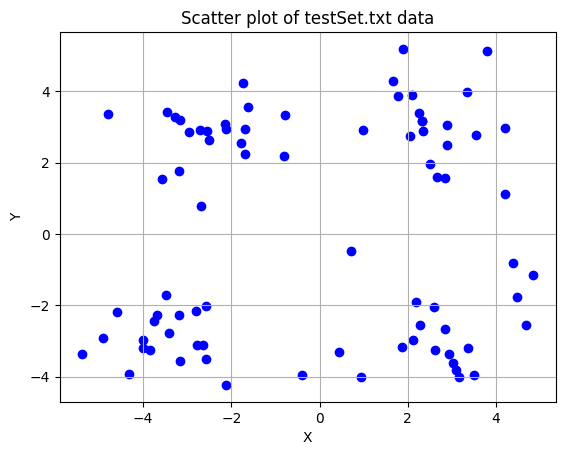

In [2]:
import matplotlib.pyplot as plt
def plot(data, centroids = None):
    data = np.array(data)
    x = data[:, 0].flatten().tolist()
    y = data[:, 1].flatten().tolist()
    plt.scatter(x, y, c='blue', marker='o')
    
    if centroids is not None:
        centroids = np.array(centroids)
        cx = centroids[:, 0].flatten().tolist()
        cy = centroids[:, 1].flatten().tolist()
        plt.scatter(cx, cy, c='red', marker='D', s=100, label='Centroïdes')
        
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter plot of testSet.txt data')
    plt.grid(True)
    plt.show()
plot(dataMat)

In [3]:
def distEclud(vecA, vecB):
    return np.sqrt(sum(np.power(vecA - vecB, 2)))
print(dataMat[0], dataMat[1])
print(distEclud(np.array(dataMat[0]), np.array(dataMat[1])))

[1.658985, 4.285136] [-3.453687, 3.424321]
5.184632816681332


In [4]:
def randCent(dataSet, k):
    n = dataSet.shape[1] #number columns
    centroids = np.array(np.zeros((k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * np.random.rand(k)
    return centroids
centroids = randCent(np.array(dataMat), 4)
print(centroids)

[[-3.27047371 -0.53168607]
 [ 1.15772599  4.67355577]
 [-3.59662538  0.76609373]
 [ 3.77124046 -4.16164524]]


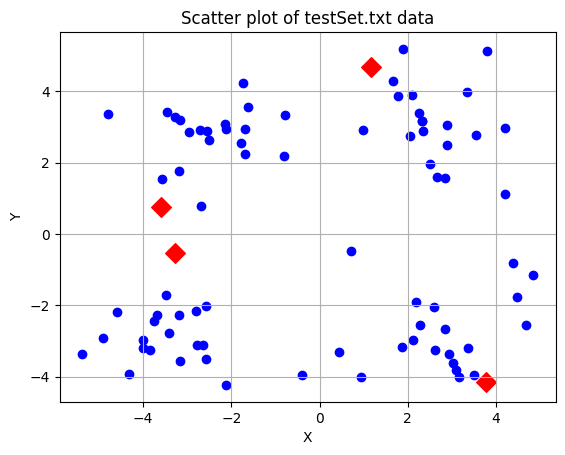

In [5]:
plot(dataMat, centroids)

In [7]:
def plot_cluster(data, clusterAssment, centroids):
    data = np.array(data)
    x = data[:, 0].flatten().tolist()
    y = data[:, 1].flatten().tolist()

    # Dictionnaire de couleurs pour les clusters (jusqu'à 10 clusters ici)
    colors = {0: "red", 1: "blue", 2: "green", 3: "purple",4: "yellow",5: "cyan",6: "orange",7: "magenta",8: "brown",9: "pink"}

    # Si clusterAssment est fourni, colorie les points selon leur cluster
    cluster_ids = clusterAssment[:, 0].flatten().astype(int).tolist()
    colors_points = [colors[cid] for cid in cluster_ids]
    plt.scatter(x, y, c=colors_points, marker='o', label='Points')

    centroids = np.array(centroids)
    cx = centroids[:, 0].flatten().tolist()
    cy = centroids[:, 1].flatten().tolist()
    plt.scatter(cx, cy, c='black', marker='D', s=100, label='Centroides')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter plot with clusters and centroids')
    plt.legend()
    plt.grid(True)
    plt.show()


In [15]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

def distCompleteLinkage(cluster1, cluster2):
    return np.max([np.linalg.norm(p1 - p2) for p1 in cluster1 for p2 in cluster2])
    
def computeCentroids(clusters):
    centroids = []
    for cluster in clusters:
        cluster_np = np.array(cluster)
        centroid = np.mean(cluster_np, axis=0)
        centroids.append(centroid)
        
    return np.array(centroids)
def agglomerativeClustering(dataSet, k):
    m = dataSet.shape[0]
    # Initialiser chaque point comme un cluster individuel
    clusters = [[dataSet[i]] for i in range(m)]

    while len(clusters) > k:
        min_dist = float('inf')
        best_pair = (0, 1)

        # Trouver la paire de clusters la plus proche
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = distCompleteLinkage(clusters[i], clusters[j])
                if dist < min_dist:
                    min_dist = dist
                    best_pair = (i, j)

        # Fusionner la meilleure paire
        i, j = best_pair
        new_cluster = clusters[i] + clusters[j]

        # Supprimer les anciens clusters et ajouter le nouveau
        clusters.pop(j)
        clusters.pop(i)
        clusters.append(new_cluster)

    # Création de la matrice des assignations finales
    clusterAssment = np.zeros((m, 1))
    for cluster_idx, cluster in enumerate(clusters):
        for point in cluster:
            index = np.where((dataSet == point).all(axis=1))[0][0]
            clusterAssment[index] = cluster_idx

    return computeCentroids(clusters), clusterAssment

In [18]:
centroids, clusterAssment = agglomerativeClustering(np.array(dataMat), 2)
print(centroids)

[[-2.986818    0.01960228]
 [ 2.63894744  0.08730749]]


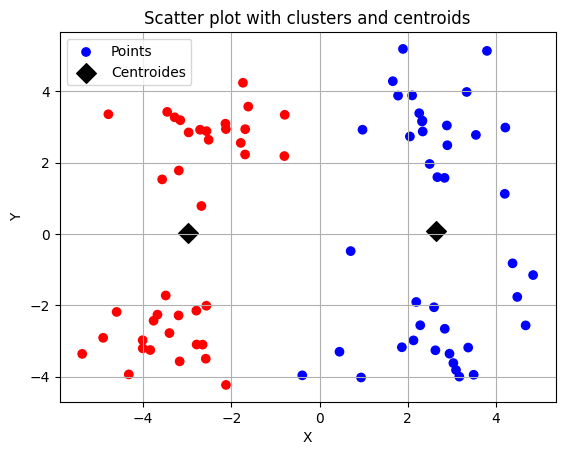

In [19]:
plot_cluster(np.array(dataMat), clusterAssment, centroids)